<a href="https://colab.research.google.com/github/stefanogiagu/corso_AI_2023/blob/main/notebooks/examples/FDL_and_logistic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# FDL & Logistic Regression Classifiers Example


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split


# IRIS dataset 
iris = datasets.load_iris()
X = iris.data[:, :2]  # take only the first two features
y = iris.target

#select only the first two classes
X = X[y<2]
y = y[y<2]

X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.5, random_state=21, shuffle=True)

In [53]:
useLogistic = False

if useLogistic == True:
    # C: Inverse of regularization strength (smaller values means stronger regularisation)
    # solver: algorithm to use in the optimization problem (sag: stochastic average gradient)
    logreg = LogisticRegression(C=1.0, solver='sag', max_iter=1000)
else:
   # FDL with loss MSE

   # Logistic regression classifier
   # stopping criterion. If it is not None, the iterations will stop when (loss > previous_loss - tol)
   logreg = SGDClassifier(loss='squared_error', max_iter=10000, learning_rate='adaptive', eta0=0.01)



# Create an instance of Logistic Regression Classifier and fit the data.
_ = logreg.fit(X_train, y_train)

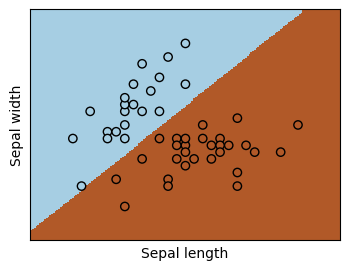

In [52]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [54]:
acc = logreg.score(X_test,y_test)
print('Accuracy:', acc)

Accuracy: 1.0
